In [191]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import os
import unidecode
import seaborn as sns

In [192]:
def filter_dataset_disasters(df):
    return df[['country', 'year', 'geolocation', 'disastertype', 'latitude', 'longitude']]

In [193]:
pathDisasters = "/home/linux/NASA-Space-Apps/datasets/pend-gdis-1960-2018-disasterlocations.csv"
pathDisastersJson = "/home/linux/NASA-Space-Apps/datasets/disasters.json"

In [194]:
if not os.path.exists(pathDisasters):
    print(f"No se encontró el archivo: {pathDisasters}")
    exit()

In [200]:
df = filter_dataset_disasters(pd.read_csv(pathDisasters))
df.head()

,country,year,geolocation,disastertype,latitude,longitude
0,Albania,2009,Ana E Malit,flood,42.020948,19.418317
1,Albania,2009,Bushat,flood,41.959294,19.514309
2,Angola,2001,Onjiva,flood,-17.093484,15.665758
3,Angola,2009,Evale,flood,-16.531533,15.773987
4,Angola,2009,Mupa,flood,-16.200065,15.844189


In [196]:
def plotGeneralHistrogram(df, disaster, minChanger = 30):
    """
    df: DataFrame bien organizado
    disaster: Tipo de desastre a filtrar
    minChanger: Número mínimo de desastres para considerar en el pais
    """

    if disaster == "mass movement (dry)" or disaster == "volcanic activity":
        minChanger = 0
    


    changerCount = df[df['disastertype'] == disaster].groupby('country').size().reset_index(name='changerCount')


    # Filtrar los países que tengan más de X terremotos (por ejemplo, 1)
    changerCountFiltered = changerCount[changerCount['changerCount'] > minChanger]

    # Ordenar los países por el número de terremotos (de menor a mayor)
    changerCountFiltered = changerCountFiltered.sort_values(by='changerCount', ascending=True)

    # Crear gráfico de barras con Seaborn
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x='country', y='changerCount', data=changerCountFiltered, palette='viridis')

    # Añadir los valores sobre las barras
    for i in ax.containers:
        ax.bar_label(i)

    # Colocar los nombres de los países en vertical
    plt.xticks(rotation=90)

    # Añadir títulos y etiquetas
    ax.set_title(f'Count of {disaster} by Country')
    ax.set_xlabel('Country')
    ax.set_ylabel(f'{disaster} Count')

    # Mostrar gráfico
    plt.show()
    return None

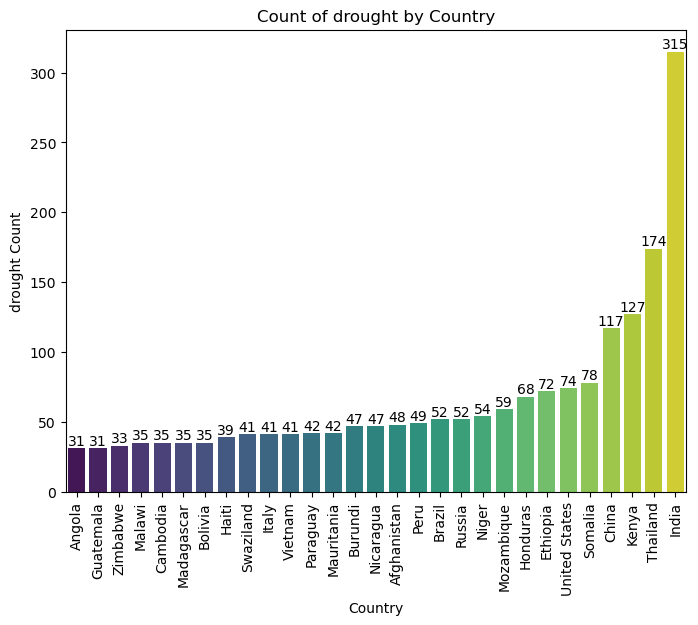

In [197]:
plotGeneralHistrogram(df, "drought")

In [198]:
def scatterPlot(df, year):
    """
    df: DataFrame con los datos de los desastres reducido
    year: Año a visualizar
    """

    # Ejemplo de DataFrame con los datos
    year = 2009
    df1 = df[df["year"] == year].copy() 
    data = {
        'year': year,
        'country': pd.array(df1.columns),
        'disastertype': pd.array(df1.columns),
        'latitude': pd.array(df1.latitude),
        'longitude': pd.array(df1.longitude)
    }

    # Agregar los puntos de los desastres usando scatter_geo, con más interactividad
    fig = px.scatter_geo(df1, 
                            lat="latitude", 
                            lon="longitude", 
                            hover_name="disastertype",  # Mostrar el tipo de desastre al pasar el ratón
                            hover_data={"country": True},  # Añadir año y país en el hover
                            color="disastertype", 
                            title="Disasters by Location")

    # Combinar el choropleth y el scatter plot

    # Mostrar el gráfico
    fig.show()

In [199]:
scatterPlot(df, 2009)

In [219]:
def plotCorrelationMatrix(df):
    """
    df: dataframe bien organizado
    """
    # Crear una tabla cruzada (pivot table) para contar la ocurrencia de desastres por país
    disaster_counts = pd.crosstab(df['country'], df['disastertype'])

    # Calcular la matriz de correlación
    correlation_matrix = disaster_counts.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, vmin=0, vmax=1)
    plt.title('Correlation Matrix of Disasters')
    plt.show()
    return None


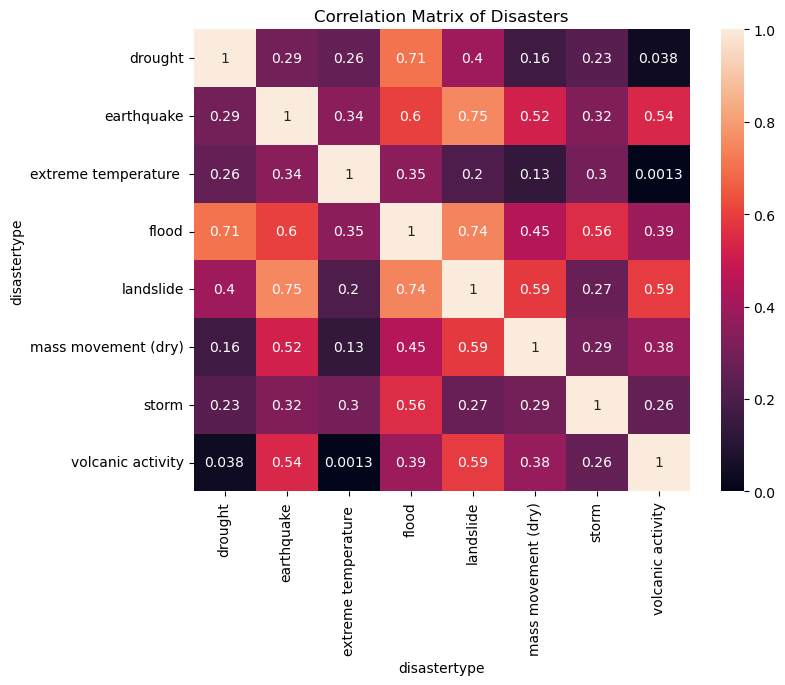

In [220]:
plotCorrelationMatrix(df)